# Desarrollo de Modelos

En esta sección, desarrollaremos varios modelos que predecirán el precio del automóvil utilizando las variables o características. Esto es solo una estimación, pero debería brindarnos una idea objetiva de cuánto debería costar el automóvil.

En este Notebook aprenderás:

* Desarrollar modelos predictivos.

Algunas preguntas son necesarias hacerlas en esta sección:

* ¿Sé si el concesionario está ofreciendo un valor justo por mi vehículo usado?
* ¿Sé si estoy dando un valor justo a mi coche?

En análisis de datos, a menudo utilizamos el Desarrollo de Modelos para ayudarnos a predecir observaciones futuras a partir de los datos que tenemos.

Un modelo puede ayudarnos a entender la relación exacta entre diferentes variables y como estas variables son usadas para predecir resultados.

Iniciamos importando las librerías necesarias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

caragamos el conjunto de datos a usar.

Haciendo uso de la librería de Pandas.

In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

df = pd.read_csv(url)

In [3]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# 1. Regresión Lineal y Regresión Lineal Multiple

## Regresión Lineal Simple

Es un método que nos ayuda a entender la relación entre dos variables:

* La variable predictor o variable `independiente` <b>X</b>
* La variable de respuesta/objetivo o variable `dependiente` (Que queremos predecir) <b>Y</b>

El resultado de la regresión lineal es una función lineal que predice la variable objetivo(dependiente) como una función de la variable predictor(independiente).

$$
 Y: Response \ Variable\\\\\\
 X: Predictor \ Variables
$$


#### Función lineal

$$
Yhat = a + b  X
$$

Donde:

* <b>a</b> se refiere a la <b>intercepción</b> de la regresión lineal, en otras palabras el valor de Y cuando X es 0.
* <b>b</b> se refiere a la <b>pendiente</b> de la regresión lineal, en otras palabras, el valor con el cual Y cambia cuando X aumenta en 1 unidad. 

Para hacer estos cálculos usaremos los módulos de la librerías de sckit-learn.

#### Cargar módulo

In [4]:
from sklearn.linear_model import LinearRegression

#### Crear el objeto de regresión lineal

In [5]:
lm = LinearRegression()
lm

LinearRegression()

<b>Cómo puede la variable "highway-mpg" ayudarnos a predecir el precio de un auto? </b>

Para este ejemplo, queremos analizar cómo la autonomía en carretera (highway-mpg) puede ayudarnos a predecir el precio del automóvil. Utilizando regresión lineal simple, crearemos una función lineal con "highway-mpg" como la variable predictora y el precio "Price" como la variable de respuesta/objetivo.

Para usar el módulo LinearRegression de scikit-learn, necesitas una matriz 2D para la variable independiente (X) y un arreglo 1D para la variable dependiente (Y).

Al pasar una sola columna como variable independiente, debes usar doble corchete `[[ ]]` para crear un DataFrame en lugar de una serie, que es lo que obtendrías con un solo corchete.

In [6]:
X = df[['highway-mpg']]
Y = df['price']

In [7]:
print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Ajusta el modelo lineal usando highway-mpg:

In [8]:
lm.fit(X,Y)

LinearRegression()

Podemos generar una predicción.

In [9]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

<b>Cuál es el valor de la intersección (a)?</b>

In [10]:
lm.intercept_

38423.3058581574

<b> Cuál es el valor de la pendiente (b)?</b>

In [11]:
lm.coef_

array([-821.73337832])

<b>Cuál es el modelo lineal estimado final que obtenemos?</b>

Como vimos antes, esperamos obtener un modelo lineal final con la estructura:

$$
Yhat = a + b  X
$$


Al reemplazar los valores reales que obtuvimos:

* a = 38423.31
* b = -821.73
* Yhat = variable a predecir `Price`
* X = variable predictora `highway-mpg`

<b>Price</b> = 38423.31 - 821.73 x <b>highway-mpg</b>

In [12]:
Price=38423.31 - 821.73*df['highway-mpg']

Creemos otra regresión lineal esta vez tomando otra variable predictora.

In [13]:
lm1 = LinearRegression()
lm1

LinearRegression()

Entrenemos al modelo usando como variable predictora/independiete "engine-size" y "price" como variable dependiente.

In [14]:
X = df[['engine-size']]
Y = df['price']

In [15]:
lm1.fit(X,Y)

LinearRegression()

Generamos la predicción.

In [16]:
Yhat = lm1.predict(X)
Yhat[:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

Valor de interseccion a.

In [17]:
lm1.intercept_

-7963.338906281046

Valor de la pendiente b.

In [18]:
lm1.coef_

array([166.86001569])

El modelo final quedaría:

<b>Price</b> = -7963.33 - 166.86 x <b>engine-size</b>

In [19]:
Price=-7963.34 + 166.86*df['engine-size']

## Regresión lineal multiple

¿Y si queremos predecir el precio del automóvil usando más de una variable?

Si queremos utilizar más variables en nuestro modelo para predecir el precio del automóvil, podemos utilizar la Regresión Lineal Múltiple. La Regresión Lineal Múltiple es muy similar a la Regresión Lineal Simple, pero este método se utiliza para explicar la relación entre una variable de respuesta continua (dependiente) y dos o más variables predictoras (independientes). La mayoría de los modelos de regresión del mundo real involucran múltiples predictores. Ilustraremos la estructura utilizando cuatro variables predictoras, pero estos resultados pueden generalizarse a cualquier entero:

$$
Y: Response \ Variable\\\\\\
X_1 :Predictor\ Variable \ 1\\\\
X_2: Predictor\ Variable \ 2\\\\
X_3: Predictor\ Variable \ 3\\\\
X_4: Predictor\ Variable \ 4\\\\
$$

$$
a: intercept\\\\\\
b_1 :coefficients \ of\ Variable \ 1\\\\
b_2: coefficients \ of\ Variable \ 2\\\\
b_3: coefficients \ of\ Variable \ 3\\\\
b_4: coefficients \ of\ Variable \ 4\\\\
$$


La ecuación esta dada por:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


En anteriores secciones conocimos que las siguientes variables eran buenas candidatas para predecir el precio del automóvil:mpg


* Horsepower
* Curb-weight
* Engine-size
* Highway-mpg

Vamos a diseñar un modelo usando esas variables como predicadores es decir variables independientes.

In [20]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Ajustar el modelo lineal usando las cuatro variables anteriores.

In [21]:
lm.fit(Z, df['price'])

LinearRegression()

Valor de la intercepción a.

In [22]:
lm.intercept_

-15806.624626329194

Valores de las pendientes b1,b2,b3,b4.

In [23]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

Valores estimado del modelo.
Recordando que la estructura de la función lineal múltiple es:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

<b>Price</b> = -15806.62 + 53.49 x <b>horsepower</b> + 4.70 x <b>curb-weight</b> + 81.53 x <b>engine-size</b> + 36.05 x <b>highway-mpg</b>

Creemos un modelo de regresión lineal multiple usando como variables predictoras "normalized-losses" y "highway-mpg".

In [24]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses','highway-mpg']],df['price'])

LinearRegression()

Valor de la pendiente b1,b2.

In [25]:
lm2.coef_

array([   1.49789586, -820.45434016])

Valor de la intercepción a.

In [26]:
lm2.intercept_

38201.31327245728

El valor estimado del modelo lineal multiple final quedaría: 

<b>Price</b> = 38201.313 + 1.497 x <b>normalized-losses</b> - 820.454 x <b>highway-mpg</b>

## Evaluación de modelo mediante visualización

Ahora que hemos desarrollado algunos modelos, ¿cómo evaluamos nuestros modelos y elegimos el mejor? Una forma de hacerlo es mediante el uso de una visualización.

Importamos el paquete de visualización, Seaborn.

In [27]:
import seaborn as sns

### Gráfica de regresión

Cuando se trata de regresión lineal simple, una excelente manera de visualizar el ajuste de nuestro modelo es mediante el uso de gráficos de regresión.

Este gráfico mostrará una combinación de puntos de datos dispersos (un gráfico de dispersión), así como la línea de regresión lineal ajustada que atraviesa los datos. Esto nos dará una estimación razonable de la relación entre las dos variables, la fuerza de la correlación, así como la dirección (correlación positiva o negativa).

Veamos la visualización de "highway-mpg" como una variable predictora potencial del precio:


(0.0, 48173.02038118289)

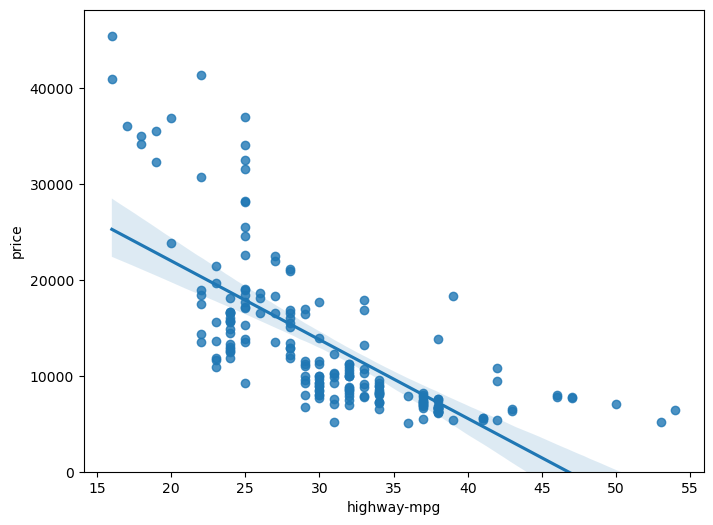

In [28]:
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

Podemos ver en este gráfico que el precio está negativamente correlacionado con highway-mpg ya que la pendiente de la regresión es negativa.

Una cosa a tener en cuenta al mirar un gráfico de regresión es prestar atención a qué tan dispersos están los puntos de datos alrededor de la línea de regresión. Esto te dará una buena indicación de la varianza de los datos y si un modelo lineal sería el mejor ajuste o no. Si los datos están demasiado lejos de la línea, este modelo lineal podría no ser el mejor modelo para estos datos.

Comparemos este gráfico con el gráfico de regresión de "peak-rpm".

(0.0, 47414.1)

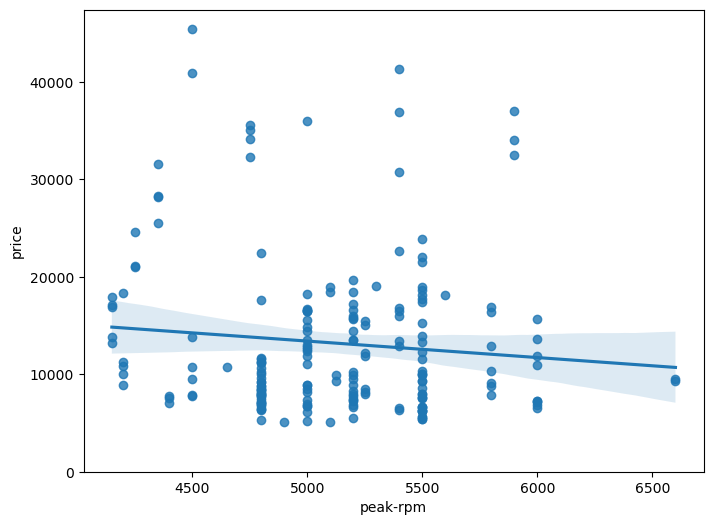

In [29]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Al comparar el gráfico de regresión de "peak-rpm" y "highway-mpg", vemos que los puntos para "highway-mpg" están mucho más cerca de la línea generada y, en promedio, disminuyen. Los puntos para "peak-rpm" tienen una mayor dispersión alrededor de la línea predicha y es mucho más difícil determinar si los puntos están disminuyendo o aumentando a medida que aumenta el "peak-rpm".

Veamos cual es la variable que más correlacionada está, usando el método `.corr()`

In [30]:
df[['highway-mpg','peak-rpm','price']].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


La variable "highway-mpg" tiene una correlación más fuerte con 'price', siendo este un aproximado de -0.704692, comparado con el aproximado de 'peak-rpm' que es de -0.101616

### Gráfica Residual

Una buena manera de visualizar la varianza de los datos es usando una gráfica de residuos.

<b> Qué es un residuo ?</b>

La diferencia entre el `valor observado (y)` y el `valor predicho (Yhat)` se llama residuo `e`. Cuando observamos un gráfico de regresión, el residuo es la distancia desde el punto de datos hasta la línea de regresión ajustada.

Entonces, <b>¿qué es un gráfico de residuos?</b>

Un gráfico de residuos es un gráfico que muestra los residuos en el eje vertical Y y la variable independiente en el eje horizontal X.

<b>¿A qué prestamos atención al mirar un gráfico de residuos?</b>

Observamos la dispersión de los residuos:

Si los puntos en un gráfico de residuos están dispersos aleatoriamente alrededor del eje x, entonces un modelo lineal es apropiado para los datos.
¿Por qué es eso? Los residuos dispersos aleatoriamente significan que la varianza es constante y, por lo tanto, el modelo lineal es un buen ajuste para estos datos.

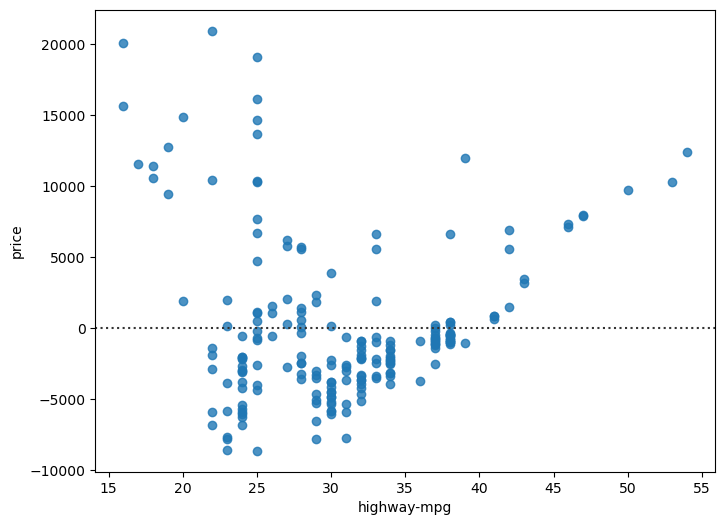

In [31]:
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

Podemos ver en este gráfico de residuos que los residuos no están dispersos aleatoriamente alrededor del eje x, lo que nos lleva a creer que quizás un modelo no lineal sea más apropiado para estos datos.

### Gráfica de regresión lineal múltiple

¿Cómo visualizamos un modelo para la regresión lineal múltiple? Esto se complica un poco más porque no se puede visualizar con un gráfico de regresión o de residuos.

Una forma de ver el ajuste del modelo es observando el gráfico de distribución. Podemos analizar la distribución de los valores ajustados que resultan del modelo y compararla con la distribución de los valores reales.

Primero, hagamos una predicción:

In [32]:
y_hat = lm.predict(Z)

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


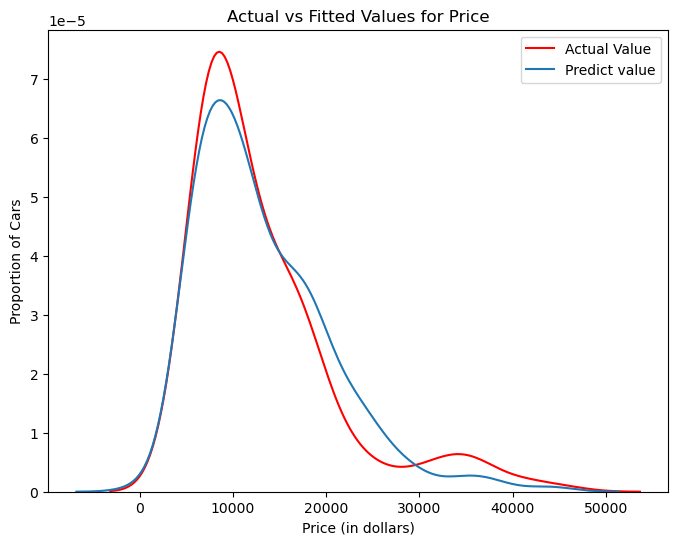

In [33]:
plt.figure(figsize=(width, height))

ax1 = sns.kdeplot(df['price'], color="r", label="Actual Value")
sns.kdeplot(y_hat, ax=ax1, label='Predict value')

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show()
plt.close()

Podemos ver que los valores ajustados están razonablemente cerca de los valores reales, ya que las dos distribuciones se superponen un poco. Sin embargo, definitivamente hay margen para mejorar.

## Regresión Polinómica y Pipelines

La regresión polinómica es un caso particular del modelo de regresión lineal general o modelos de regresión lineal múltiple.

Obtenemos relaciones no lineales al elevar al cuadrado o establecer términos de orden superior de las variables predictoras.

Existen diferentes órdenes de regresión polinómica:

<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$


<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\
$$


<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


Vimos anteriormente que un modelo lineal no proporcionaba el mejor ajuste al usar "highway-mpg" como variable predictora. Veamos si podemos intentar ajustar un modelo polinómico a los datos en su lugar.

Usaremos la siguiente función para graficar los datos.

In [34]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Establecer las variables:

In [35]:
x = df['highway-mpg']
y = df['price']

Ajustemos el polinomio usando la función `polyfit`, luego usemos la función `poly1d` para mostrar la función polinómica.

In [36]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Graficamos la función

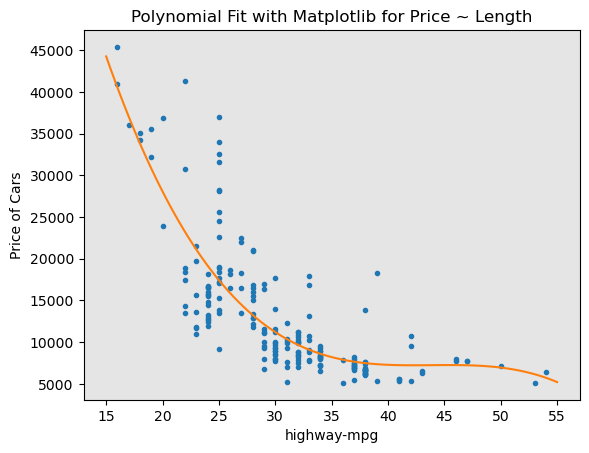

In [38]:
PlotPolly(p, x, y, 'highway-mpg')

Ya podemos ver desde la gráfica que este modelo polinómico funciona mejor que el modelo lineal realizado anteriormente. Esto se debe a que la función polinómica generada "interseca" más puntos de datos.

Creemos la misma predicción pero esta vez de una orden polinomial de grado 11.

In [47]:
f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f1)
print(p1)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


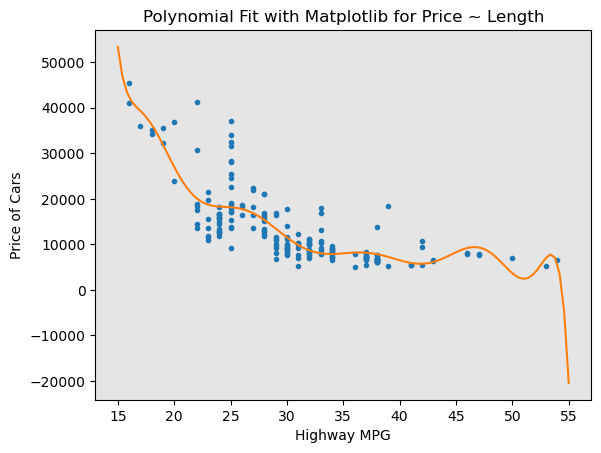

In [48]:
PlotPolly(p1,x,y,"Highway MPG")

La expresión analítica para una función polinómica multivariable se vuelve complicada. Por ejemplo, la expresión para un polinomio de segundo orden (grado=2) con dos variables se da por:

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$


Podemos realizar una transformación polinómica en múltiples características. Primero, importamos el módulo:

In [49]:
from sklearn.preprocessing import PolynomialFeatures

Creamos un objeto `PolinomialFeatures` de grado 2.

In [50]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [51]:
z_pr = pr.fit_transform(Z)

In [52]:
Z.shape

(201, 4)

In [ ]:
En los datos originales, hay 201 muestras y 4 características.

In [54]:
Z.head()

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548,130,27
1,111.0,2548,130,27
2,154.0,2823,152,26
3,102.0,2337,109,30
4,115.0,2824,136,22


Después de la transformación, hay 201 muestras y 151 características.

In [55]:
z_pr.shape

(201, 15)

In [57]:
type(z_pr)

numpy.ndarray

## Pipelines

Los pipelines de datos simplifican los pasos de procesamiento de los datos. Usamos el módulo `Pipeline` para crear un pipeline. También utilizamos `StandardScaler` como un paso en nuestro pipeline.

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Creamos el pipeline creando una lista de tuplas que incluyen el nombre del modelo o estimador y su constructor correspondiente.

In [59]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

Ingresamos la lista como un argumento al constructor del pipeline:

In [60]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Primero, convertimos el tipo de datos Z a tipo float para evitar advertencias de conversión que pueden aparecer como resultado de que StandardScaler tome entradas de tipo float.

Luego, podemos normalizar los datos, realizar una transformación y ajustar el modelo simultáneamente.

In [61]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Del mismo modo, podemos normalizar los datos, realizar una transformación y producir una predicción simultáneamente

In [62]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

Vamos a crear un pipeline que estandarice los datos y luego produzca una predicción utilizando un modelo de regresión lineal usando las características Z y el objetivo y.}

In [63]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

## Medidas para la evaluación en muestra

Cuando evaluamos nuestros modelos, no solo queremos visualizar los resultados, sino que también queremos una medida cuantitativa para determinar qué tan precisa es el modelo.

Dos medidas muy importantes que a menudo se usan en estadísticas para determinar la precisión de un modelo son:

* <b>R^2 / R-cuadrado</b>
* <b>Error cuadrático medio (MSE)</b>


<b>R-cuadrado</b>

También conocido como el coeficiente de determinación, es una medida que indica qué tan cerca están los datos de la línea de regresión ajustada.

El valor del R-cuadrado es el porcentaje de variación de la variable de respuesta (y) que es explicado por un modelo lineal.

<b>Error Cuadrático Medio</b>

El Error Cuadrático Medio mide el promedio de los cuadrados de los errores. Es decir, la diferencia entre el valor real (y) y el valor estimado (ŷ).

### Modelo 1: Regresión Lineal Simple

Calculemos R-cuadrado.

In [64]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7609686443622008


Podemos decir que aproximadamente el 76.096% de la variación del precio se explica mediante este modelo lineal simple "highway_mpg_fit".

Ahora calculemos el MSE:

Podemos predecir a salida yhat usando el método de predicción, donde X es la entrada de la variable.

In [65]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [13728.4631336  13728.4631336  17399.38347881 10224.40280408]


Importamos el la función `mean_squared_error` desde el módulo `metrics`.

In [67]:
from sklearn.metrics import mean_squared_error

Podemos comparar los resultados de la predicción con los resultados actuales.

In [68]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.025174143


## Modelo 2: Regresión Lineal Múltiple

Calculamos R-cuadrado.

In [71]:
#fit the model
lm.fit(Z, df['price'])
# R-cuadrado
print("R-cuadrado es:",lm.score(Z, df['price']))

R-cuadrado es: 0.8093562806577457


Podemos decir que aproximadamente el 80.896 % de la variación del precio se explica mediante esta regresión lineal múltiple "multi_fit".

Calculemos el MSE: 

In [72]:
Y_hat_predict = lm.predict(Z) 

Comparamos los resultados de la predicción con los resultados actuales.

In [83]:
print('El MSE del precio y el valor de la prediccion usando multi_fit es:',mean_squared_error(df['price'], Y_hat_predict))

El MSE del precio y el valor de la prediccion usando multi_fit es: 11980366.87072649


## Modelo 3:Regresión Polinomial

Calculamos R-cuadrado

Importamos la función `r2_score` del módulo `metrics` dado a que se usa una función distinta.

In [80]:
from sklearn.metrics import r2_score

Aplicamos la función para encontrar el valor de R-cuadrado.

In [81]:
r_squared = r2_score(y, p(x))
print("El valor de R-cuadrado es:", r_squared)

El valor de R-cuadrado es: 0.674194666390652


Podemos decir que aproximadamente el 67.419 % de la variación del precio se explica mediante este ajuste polinómico.

Calulamos el MSE

In [82]:
mean_squared_error(df['price'], p(x))

20474146.426361214

## Predicción y Toma de Decisiones

### Predicción

En la sección anterior, entrenamos el modelo usando el método fit. Ahora usaremos el método predict para producir una predicción. Importemos pyplot para graficar; también utilizaremos algunas funciones de numpy.

In [85]:
import matplotlib.pyplot as plt
import numpy as np

Creamos una nueva entrada.

In [86]:
new_input = np.arange(1, 100, 1).reshape(-1,1)

Entrenamos el modelo.

In [87]:
lm.fit(X,Y)
lm

LinearRegression()

Realizamos una predicción.

In [88]:
yhat = lm.predict(new_input)
yhat[:5]

D:\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

Graficamos los datos.

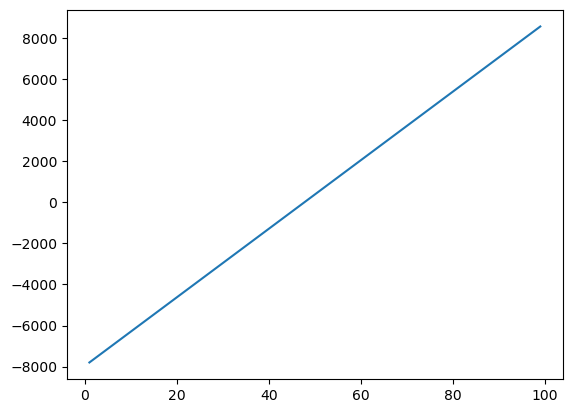

In [90]:
plt.plot(new_input, yhat)
plt.show()

## Toma de decisiones: Determinando un buen ajuste del modelo

Ahora que hemos visualizado los diferentes modelos y generado los valores de R-cuadrado y MSE para los ajustes, ¿cómo determinamos un buen ajuste del modelo?

<b>¿Qué valor de R-cuadrado es bueno?</b>

Al comparar modelos, el modelo con el <b><i>valor de R-cuadrado más alto es un mejor ajuste para los datos</i></b>.

<b>¿Qué es un buen MSE?</b>

Al comparar modelos, el modelo con el <b><i>valor de MSE más pequeño es un mejor ajuste para los datos.</i></b>

Veamos los valores para los diferentes modelos. 

<b>Regresión lineal simple:</b> Usando Highway-mpg como variable predictora del precio.

* R-cuadrado: 0.7609686443622008
* MSE: 1.50 x10^7 


<b>Regresión lineal múltiple:</b> Usando Horsepower, Curb-weight, Engine-size y Highway-mpg como variables predictoras del precio.

* R-cuadrado: 0.8093562806577457
* MSE: 1.19 x10^7 

<b>Ajuste polinómico:</b> Usando Highway-mpg como variable predictora del precio.

* R-cuadrado: 0.674194666390652
* MSE: 2.04 x 10^7

### Modelo de regresión lineal simple (SLR) vs. Modelo de regresión lineal múltiple (MLR)

Por lo general, cuantas más variables tengas, mejor será tu modelo para predecir, pero esto no siempre es cierto. A veces puede que no tengas suficientes datos, te encuentres con problemas numéricos o muchas de las variables pueden no ser útiles e incluso actuar como ruido. Por lo tanto, siempre debes verificar el MSE y R-cuadrado.

Para comparar los resultados de los modelos MLR vs. SLR, observamos una combinación tanto del R-cuadrado como del MSE para hacer la mejor conclusión sobre el ajuste del modelo.

* <b>MSE:</b> El MSE de SLR es 1.50 x10^7 mientras que MLR tiene un MSE de 1.19 x10^7. El MSE de MLR es mucho más pequeño.
* <b>R-cuadrado:</b> En este caso, también podemos ver que hay una gran diferencia entre el R-cuadrado de SLR y el R-cuadrado de MLR. El R-cuadrado para SLR (~ 0.7609) es más pequeño en comparación con el R-cuadrado para MLR (~ 0.809).
  
Este R-cuadrado en combinación con el MSE muestra que <b><i>MLR parece ser el mejor ajuste de modelo en este caso en comparación con SLR</b></i>.

### Modelo de regresión lineal simple (SLR) vs. Ajuste polinómico

* <b>MSE:</b> Podemos ver que el Ajuste Polinómico redujo el MSE, ya que este MSE es más pequeño que el de SLR.
* <b>R-cuadrado:</b> El R-cuadrado para el Ajuste Polinómico es más grande que el R-cuadrado para SLR, por lo que el Ajuste Polinómico también aumentó bastante el R-cuadrado.
  
Dado que el Ajuste Polinómico resultó en un MSE más bajo y un R-cuadrado más alto, podemos concluir que el <b><i>Ajuste polinómico fue un modelo de mejor ajuste que la regresión lineal simple</b></i> para predecir "precio" con "highway-mpg" como variable predictora.

### Regresión lineal múltiple (MLR) vs. Ajuste polinómico

* <b>MSE:</b> El MSE para MLR es más pequeño que el MSE para el Ajuste Polinómico.
* <b>R-cuadrado:</b> El R-cuadrado para MLR también es mucho más grande que para el Ajuste Polinómico.

### Conclusión

Comparando estos tres modelos, concluimos que el modelo <b><i>MLR es el mejor modelo para poder predecir el precio a partir de nuestro conjunto de datos</b></i>. Este resultado tiene sentido ya que tenemos 27 variables en total y sabemos que más de una de esas variables son posibles predictores del precio final del automóvil.

<hr/>

## Autor:
Jonathan Palan

## Carga y cambios

| Fecha             |Por         |  Descripción                                  |
| -----------------| ---------------| ----------------------------------------------|
| 2024-05-07      | Jonathan Palan | Traducción curso Data Analysis with Python|

## Bibliografía

[1] IBM,"Data Analysis with Python", Skills Network 
<hr/>